## 1. Company POV

 - Name
 - Founders
 - Industry
 - Subindustry
 - Location
 - Funding Rounds
 - Stage
 - Investors
 - Date
 - Similar company

## 2. Investor POV

 - Name
 - Recent Investments
 - Biggest investments
 - Generally invests in ...

 - Sector->pie
    - stage ->pie
    - city -> pie
    - YoY investment araph
    - Similar Investors

## 3. General Analysis

 - MOM chartl-> Total + Count
 - Cards -> Total + Max + Avg -> Total funded startups
 - Sector Analysis Pie -> top sectors (Count + Sum)
 - Type of funding
 - City wise funding
 - Top Startups -> year wise -> Overall
 - Top investors
 - Funding Heatmap

In [2]:
# import streamlit as st
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import re
import numpy as np

In [3]:

df = pd.read_csv("D:\DS\Data Science\CampusX\python\Data Analysis on Indian Startup Funding Dataset\startup_funding.csv")
# df.head()

# st.title("Startup Dashboard")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\Abhijit\AppData\Local\Temp\ipykernel_18908\2036604955.py:1: SyntaxWarning: invalid escape sequence '\D'
  df = pd.read_csv("D:\DS\Data Science\CampusX\python\Data Analysis on Indian Startup Funding Dataset\startup_funding.csv")


In [4]:
df.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3044 entries, 0 to 3043
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Sr No              3044 non-null   int64 
 1   Date dd/mm/yyyy    3044 non-null   object
 2   Startup Name       3044 non-null   object
 3   Industry Vertical  2873 non-null   object
 4   SubVertical        2108 non-null   object
 5   City  Location     2864 non-null   object
 6   Investors Name     3020 non-null   object
 7   InvestmentnType    3040 non-null   object
 8   Amount in USD      2084 non-null   object
 9   Remarks            419 non-null    object
dtypes: int64(1), object(9)
memory usage: 237.9+ KB


In [6]:
# df["Investors Name"] = df["Investors Name"].fillna("Undisclosed")

In [7]:
df.drop(columns="Remarks", inplace=True)

In [8]:
df.set_index("Sr No", inplace=True)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Date dd/mm/yyyy    3044 non-null   object
 1   Startup Name       3044 non-null   object
 2   Industry Vertical  2873 non-null   object
 3   SubVertical        2108 non-null   object
 4   City  Location     2864 non-null   object
 5   Investors Name     3020 non-null   object
 6   InvestmentnType    3040 non-null   object
 7   Amount in USD      2084 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [10]:
df.rename(columns={"Date dd/mm/yyyy" : "date",
                   "Startup Name" : "startup",
                   "Industry Vertical":"vertical",
                   "SubVertical":"subvertical",
                   "City  Location":"city",
                   "Investors Name":"investors",
                   "InvestmentnType":"round",
                    "Amount in USD":"amount"}, inplace=True)

In [11]:
df["amount"] = df["amount"].fillna("0")
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3044 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         3044 non-null   object
 1   startup      3044 non-null   object
 2   vertical     2873 non-null   object
 3   subvertical  2108 non-null   object
 4   city         2864 non-null   object
 5   investors    3020 non-null   object
 6   round        3040 non-null   object
 7   amount       3044 non-null   object
dtypes: object(8)
memory usage: 214.0+ KB


In [12]:
df["amount"] = df["amount"].str.replace(",",'')
df["amount"] = df["amount"].str.replace("undisclosed","0")
df["amount"] = df["amount"].str.replace("unknown","0")
df["amount"] = df["amount"].str.replace("Undisclosed","0")

In [13]:
df = df[df["amount"].str.isdigit()]

In [14]:
df["amount"] = df["amount"].astype("float")

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         3029 non-null   object 
 1   startup      3029 non-null   object 
 2   vertical     2858 non-null   object 
 3   subvertical  2104 non-null   object 
 4   city         2849 non-null   object 
 5   investors    3005 non-null   object 
 6   round        3027 non-null   object 
 7   amount       3029 non-null   float64
dtypes: float64(1), object(7)
memory usage: 213.0+ KB


In [16]:
def to_inr(dollar):
    inr = dollar * 82.5
    return inr/10000000

In [17]:
df["amount"] =df["amount"].apply(to_inr)
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [18]:
# df["date"].str.replace("05/072018","05/07/2018")
# cr["Year"] = cr["Year"].apply(lambda x : int(re.findall(r"\d{4}",str(x))[0]))
df["date"] = df["date"].apply(lambda x: "{}/{}/{}".format(x[3:5],x[0:2],x[6:])if int(x[:2]) > 12 else x )

In [19]:
df["date"] = pd.to_datetime(df["date"], errors="coerce")

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         3024 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3005 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 213.0+ KB


In [21]:
df= df.dropna(subset=["date","startup","vertical", "city", "investors","round","amount"])

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2819 entries, 1 to 2873
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         2819 non-null   datetime64[ns]
 1   startup      2819 non-null   object        
 2   vertical     2819 non-null   object        
 3   subvertical  2077 non-null   object        
 4   city         2819 non-null   object        
 5   investors    2819 non-null   object        
 6   round        2819 non-null   object        
 7   amount       2819 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(6)
memory usage: 198.2+ KB


In [23]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [24]:
#importing data
df = pd.read_csv("startup_funding.csv")


df["Investors Name"] = df["Investors Name"].fillna("Undisclosed") #fill na values investor name with undisclosed
df.drop(columns="Remarks", inplace=True) #Drop Remarks column becoz it doesnot have 90% values
df.set_index("Sr No", inplace=True)      # set indes as for convinent

df.rename(columns={"Date dd/mm/yyyy" : "date","Startup Name" : "startup","Industry Vertical":"vertical","SubVertical":"subvertical","City  Location":"city","Investors Name":"investors","InvestmentnType":"round","Amount in USD":"amount"}, inplace=True) # Rename column names for shortcut modularity 

# Convert $ to inr (cr)
df["amount"] = df["amount"].fillna("0")
df["amount"] = df["amount"].str.replace(",","")
df["amount"] = df["amount"].str.replace("undisclosed","0")
df["amount"] = df["amount"].str.replace("unknown","0")
df["amount"] = df["amount"].str.replace("Undisclosed","0")
df = df[df["amount"].str.isdigit()] # filter data if amount value is digit
df["amount"] = df["amount"].astype("float") # changing data type to int to float

# Convert $ to inr (cr) for readability 
def to_inr(dollar):
    inr = dollar * 82.5
    return (inr/10000000)
df["amount"] =df["amount"].apply(to_inr) # calling the Function

#Convert date colomn into datatime object
df["date"] = pd.to_datetime(df["date"],errors="coerce")


In [25]:
investors = sorted(set(df["investors"].str.split(",").sum()))

In [26]:
df[df["investors"].str.contains("Softbank",case=False)].head()

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
17,NaT,Lenskart.com,E-Commerce,Online Eyewear Shopping Portal,Faridabad,SoftBank Vision Fund,Series G,1905.750
60,NaT,Grofers,E-Commerce,Grocery Delivery,Gurgaon,Softbank Vision Fund,Series F,577.500
136,NaT,Automation Anywhere,Automation,Robotics,California,SoftBank Vision Fund,Series B,2475.000
142,NaT,Engineer.ai,Software,AI Platform,India/US,"Lakestar and Jungle Ventures, Softbank\\xe2\\x...",Series A,243.375
249,NaT,PolicyBazaar,Consumer Internet,Online Insurance Selling Platform,Gurugram,SoftBank Vision Fund & Info Edge (India) Ltd,Private Equity,1650.000


In [27]:
df[df["investors"].str.contains("Softbank",case=False)].groupby("startup")["amount"].sum().sort_values(ascending=False)

startup
Flipkart               20625.000
Paytm                  11550.000
Ola                     6847.500
Snapdeal                4125.000
Oyo Rooms               2887.500
Ola Cabs                2763.750
Automation Anywhere     2475.000
Grofers                 2079.000
OYO Rooms               2062.500
Lenskart.com            1905.750
PolicyBazaar            1650.000
Hike                    1443.750
Oyorooms                 825.000
Oyo                      825.000
OyoRooms                 511.500
Engineer.ai              243.375
Housing.com              165.000
True Balance             123.750
Name: amount, dtype: float64

In [28]:
temp = df.head()
temp

,date,startup,vertical,subvertical,city,investors,round,amount
Sr No,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000


In [29]:
px.bar(temp,x="city",y="amount")

In [30]:
df[df["investors"].str.contains("Softbank", case=False)].groupby("vertical")["amount"].sum()

vertical
Automation                                2475.000
Budget Hotel Accommodation                 825.000
Budget Hotel accommodation brand           825.000
Cab rental Mobile app                     1856.250
Car Aggregator & Retail Mobile App        4125.000
Consumer Internet                        12985.500
E-Commerce                                2483.250
ECommerce                                11550.000
Ecommerce Marketplace                     4125.000
Hyper-local Grocery Delivery platform      990.000
Software                                   243.375
Technology                                   0.000
eCommerce                                20625.000
Name: amount, dtype: float64

In [31]:
df[df["investors"].str.contains("IFC", case=False)].groupby("city")["amount"].sum().sort_values(ascending = False)

city
Bangalore    998.25
Mumbai       511.50
New Delhi    222.75
Gurgaon      214.50
Name: amount, dtype: float64

In [32]:
df["year_inv"] = df["date"].dt.year

In [33]:
df.head()

,date,startup,vertical,subvertical,city,investors,round,amount,year_inv
Sr No,,,,,,,,,
1,2020-09-01,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,1650.000000,2020.0
2,NaT,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,66.399250,NaN
3,2020-09-01,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,151.460595,2020.0
4,2020-02-01,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,24.750000,2020.0
5,2020-02-01,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,14.850000,2020.0


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
 8   year_inv     1283 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(6)
memory usage: 236.6+ KB


In [35]:
df[df["investors"].str.contains("IFC", case = False)].groupby("year_inv")["amount"].sum()

year_inv
2015.0    441.375
2017.0    214.500
2018.0    181.500
Name: amount, dtype: float64

In [36]:
df.groupby("startup")["amount"].sum().sort_values(ascending=False).head(1)

startup
Flipkart    33492.525
Name: amount, dtype: float64

In [37]:
df["startup"].nunique()

2448

In [38]:
df[df["startup"].str.contains("Rapido Bike Taxi")]

,date,startup,vertical,subvertical,city,investors,round,amount,year_inv
Sr No,,,,,,,,,
61,NaT,Rapido Bike Taxi,Transportation,Bike Taxi,Bengaluru,Westbridge Capital,Series B,32175.0,NaN


In [39]:
df["month"] = df["date"].dt.month_name()

In [40]:
# df["year"] = df[~df["year_inv"].isin([np.nan])]["year_inv"].astype("int32")

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
 8   year_inv     1283 non-null   float64       
 9   month        1283 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 260.3+ KB


In [42]:
# df.groupby(["year_inv","month"])["amount"].sum().pivot_table(index="month",columns= "year_inv",values = "amount")
df2 = df.groupby(["year_inv","month"])[["amount"]].sum()

In [43]:
df.groupby(["year_inv","month"])[["amount"]].sum()

amount
year_inv month                 
2015.0   April      1944.896250
         August     5616.187500
         December   1333.200000
         February   1862.194950
         January    5274.637500
...                         ...
2019.0   October    1647.377985
         September     8.250000
2020.0   February     39.600000
         October    1237.500000
         September  1801.460595

[62 rows x 1 columns]

In [44]:
df2.pivot_table(index="month",columns="year_inv",aggfunc="sum")

amount                                                     \
year_inv        2015.0      2016.0       2017.0       2018.0       2019.0   
month                                                                       
April      1944.896250  1338.81000    871.16700   717.486000  5611.650000   
August     5616.187500   458.61750    999.11625  2253.075000  1896.704741   
December   1333.200000  1624.61475    959.97000  1667.944484  1233.375000   
February   1862.194950   576.18000    218.70750   383.044200  5416.125000   
January    5274.637500   308.51700   3577.20000  5036.946709  3241.466250   
July       2521.247586  2783.05500   3261.30750  1490.981250          NaN   
June       3439.053750   182.81175   1573.19250  1679.700000  1228.165950   
March      2536.322250   656.28750   3926.17500  2161.986750  1464.375000   
May        1086.937500   912.47475   1025.33475  1821.187500   457.875000   
November   1356.300000  2553.44925  21379.99050   412.079250  1153.350000   
October    1516.061250   546.35625    488.75475  1059.605250  1647.377985   
September  1107.447000   664.53750    514.72575   300.433155     8.250000   

                        
year_inv        2020.0  
month                   
April              NaN  
August             NaN  
December           NaN  
February     39.600000  
January            NaN  
July               NaN  
June               NaN  
March              NaN  
May                NaN  
November           NaN  
October    1237.500000  
September  1801.460595

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
 8   year_inv     1283 non-null   float64       
 9   month        1283 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 260.3+ KB


In [46]:
sec_anal = df.groupby("subvertical")["amount"].sum().sort_values(ascending = False).head(10)

([<matplotlib.patches.Wedge at 0x26340670e60>,
 [Text(0.6485381273217559, 0.8884808931034984, 'Bike Taxi'),
  Text(-0.8936666698594933, 0.6413734350456398, 'Online Marketplace'),
  Text(-1.0017172844651658, -0.45449145426920223, 'ECommerce Marketplace'),
  Text(-0.41108536860551054, -1.020298397390916, 'Mobile Wallet & ECommerce platform'),
  Text(0.24414871389729095, -1.072563007707379, 'Mobile Wallet'),
  Text(0.6420951845648238, -0.8931482373932477, 'Private Equity Firm'),
  Text(0.8677788354649068, -0.6759880862257636, 'Business development'),
  Text(1.007836707208254, -0.44075522867417505, 'Wearable Fitness Bands'),
  Text(1.07246599160295, -0.24457452208907918, 'App based cab aggregator'),
  Text(1.0971240998267613, -0.07949031122922573, 'Robotics')],
 [Text(0.3537480694482304, 0.48462594169281725, '29.9%'),
  Text(-0.48745454719608716, 0.34984005547943986, '20.3%'),
  Text(-0.5463912460719086, -0.24790442960138298, '13.0%'),
  Text(-0.224228382875733, -0.5565263985768633, '11.2%

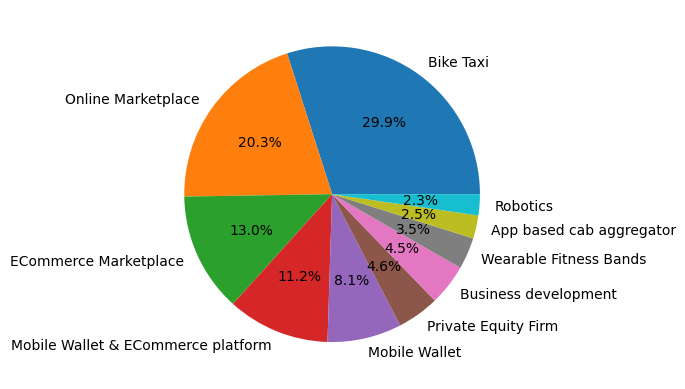

In [47]:
plt.pie(sec_anal,labels = sec_anal.index,autopct = "%0.1f%%")

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3029 entries, 1 to 3044
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1283 non-null   datetime64[ns]
 1   startup      3029 non-null   object        
 2   vertical     2858 non-null   object        
 3   subvertical  2104 non-null   object        
 4   city         2849 non-null   object        
 5   investors    3029 non-null   object        
 6   round        3027 non-null   object        
 7   amount       3029 non-null   float64       
 8   year_inv     1283 non-null   float64       
 9   month        1283 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(7)
memory usage: 260.3+ KB


In [49]:
top_inv = df.groupby("investors")["amount"].sum().sort_values(ascending=False).head(10)

In [50]:
pd.DataFrame(top_inv)

,amount
investors,
Westbridge Capital,32175.000000
Softbank,20625.000000
SoftBank Group,12061.500000
"Microsoft, eBay, Tencent Holdings",11550.000000
Vijay Shekhar Sharma,8251.237500
Steadview Capital and existing investors,5775.000000
"Alibaba Group, Ant Financial",5610.000000
Undisclosed,5389.485346
"Altimeter Capital, DST Global",4826.250000


- Founders
 - Industry
 - Subindustry
 - Location
 - Funding Rounds
 - Stage
 - Investors
 - Date
 - Similar company

In [58]:
df["startup"].value_counts().sort_values(ascending=False)

startup
Ola Cabs                    8
Swiggy                      8
Paytm                       7
NoBroker                    6
UrbanClap                   6
                           ..
Tookitaki                   1
Furtados School of Music    1
Vogo Automotive             1
Yo Grad                     1
Gadgets 360                 1
Name: count, Length: 2448, dtype: int64

array([list(['Tekne', 'Capital', 'Management', 'LLCFalcon', 'Edge', 'Capital,\\\\xc2\\\\xa0', 'Capital', 'AdvisersSoftBank', 'Group', 'CorpBaillie', 'Gifford,', 'Falcon', 'Edge', 'Capital,', 'Tiger', 'Global,', 'SoftBank', 'Group,', 'DST', 'Global,', 'Didi', 'Kuaidi'])],
      dtype=object)

In [74]:
inv = df[df["startup"].str.contains("Ola",case=True)]

In [75]:
inv

,date,startup,vertical,subvertical,city,investors,round,amount,year_inv,month
Sr No,,,,,,,,,,
65,2019-03-07,Ola Cabs,Transport,Cabs,Kormangala,"DIG Investment Ab, Deshe Holdings, Samih Touka...",Series J,8.250,2019.0,March
90,2019-06-05,Ola Electric,Transport,Cabs,Bengaluru,Tata Sons,Series A,0.000,2019.0,June
524,2017-03-10,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,"Tencent, Softbank Group",Private Equity,907.500,2017.0,March
571,NaT,Ola Cabs,Consumer Internet,App based cab hailing services,Bangalore,ANI Technologies Pvt. Ltd,Private Equity,63.525,NaN,NaN
654,2017-11-08,Ola Cabs,Consumer Internet,App based cab aggregation Service,Gurgaon,Tekne Capital Management,Private Equity,297.000,2017.0,November
749,NaT,Ola,Consumer Internet,Cab Aggregation App,Bangalore,Tekne Capital Management LLC,Private Equity,412.500,NaN,NaN
792,2017-03-05,Ola,Consumer Internet,Cab Aggregation App,Bangalore,"Falcon Edge Capital,\\xc2\\xa0 Capital Advisers",Private Equity,862.125,2017.0,March
890,NaT,Ola Cabs,Consumer Internet,Cab Aggregator App,Bangalore,SIMI Pacific Pte,Private Equity,2145.000,NaN,NaN
925,2017-01-03,Ola,Consumer Internet,App based cab aggregator,Bangalore,SoftBank Group Corp,Private Equity,2722.500,2017.0,January


In [82]:
df[df["startup"].str.contains("OfBusiness",case=True)]["amount"].sum().item()

164.175